## Summary Compensation Table pay

Following along this tutorial: https://sec-api.io/docs/executive-compensation-api/python-example

In [1]:
from sec_api import ExecCompApi
import config

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
execCompApi = ExecCompApi(config.sec_api_key)

In [4]:
result_ticker = execCompApi.get_data('AAPL')

In [5]:
pd.DataFrame(result_ticker)

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings
0,21bce6f864ee3d67e61232da5e371dcc,320193,AAPL,Jeff Williams,Chief Operating Officer,2021,1000000,0,21959620,0,4000000,17437,26977057,NaN
1,39c3be85559f978fceb001ed65f805a9,320193,AAPL,Tim Cook,Chief Executive Officer,2021,3000000,0,82347835,0,12000000,1386559,98734394,NaN
2,5672125e1128cae081168ab797e4184f,320193,AAPL,Kate Adams,"Senior Vice President, General Counsel and Sec...",2021,1000000,0,21959620,0,4000000,14533,26974153,NaN
3,c34027ebeff9e609633c259618269ca3,320193,AAPL,Luca Maestri,"Senior Vice President, Chief Financial Officer",2021,1000000,0,21959620,0,4000000,18883,26978503,NaN
4,73ba5d6d21abab167c84c61f4a5b8e2f,320193,AAPL,Deirdre O Brien,"Senior Vice President, Retail + People",2021,1000000,0,21959620,0,4000000,61191,27020811,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,8d28713ae5fd1a346a051fa53b53660d,320193,AAPL,Ronald B. Johnson,"Senior Vice President, Retail",2007,600012,0,4946610,0,600000,379,6147001,0.0
92,5424fc3e116446ac4ff2a9350287ef62,320193,AAPL,Tony Fadell,"Senior Vice President, iPod Division",2007,500009,6750,3705832,628628,500000,13952,5355171,0.0
93,bd011145bebfe58a89964a4f9d838b9f,320193,AAPL,Timothy D. Cook,Chief Operating Officer,2007,700014,0,6943426,0,700000,13750,8357190,0.0
94,dcb180477323949b9e2b2a3910e93dfb,320193,AAPL,Peter Oppenheimer,Senior Vice President and Chief Financial Officer,2007,600012,0,4946610,0,600000,598723,6745345,0.0


In [6]:
result_ticker[0].keys()

dict_keys(['id', 'cik', 'ticker', 'name', 'position', 'year', 'salary', 'bonus', 'stockAwards', 'optionAwards', 'nonEquityIncentiveCompensation', 'otherCompensation', 'total'])

In [7]:
result_ticker[0].values()

dict_values(['21bce6f864ee3d67e61232da5e371dcc', '320193', 'AAPL', 'Jeff Williams', 'Chief Operating Officer', 2021, 1000000, 0, 21959620, 0, 4000000, 17437, 26977057])

In [8]:
for key in result_ticker[0].keys():
    print(key, result_ticker[0][key])

id 21bce6f864ee3d67e61232da5e371dcc
cik 320193
ticker AAPL
name Jeff Williams
position Chief Operating Officer
year 2021
salary 1000000
bonus 0
stockAwards 21959620
optionAwards 0
nonEquityIncentiveCompensation 4000000
otherCompensation 17437
total 26977057


In [9]:
aapl_mainpay_df = pd.DataFrame(result_ticker)

In [10]:
aapl_mainpay_df.to_csv('old_files/AAPL_SCTpay.csv',index=False)

<AxesSubplot:xlabel='year', ylabel='salary'>

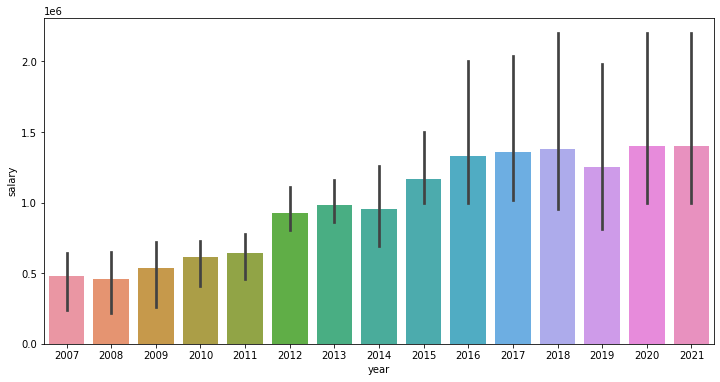

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(data=aapl_mainpay_df,x='year',y='salary',dodge=False)

In [12]:
for i in range(0,5):
    print(result_ticker[i]['name'])

Jeff Williams
Tim Cook
Kate Adams
Luca Maestri
Deirdre O Brien


### Let's save the dictionary as a .txt file for later parsing
https://www.geeksforgeeks.org/write-a-dictionary-to-a-file-in-python/

https://stackoverflow.com/questions/4803999/how-to-convert-a-file-into-a-dictionary

https://www.geeksforgeeks.org/how-to-read-dictionary-from-file-in-python/

In [13]:
import json

In [14]:
#saving the dictionary as a text file
with open('old_files/AAPL_SCTpay_2021.txt', 'w') as converted_file:
    converted_file.write(json.dumps(result_ticker))

##### And now the inverse process, reading the file back

In [15]:
#reading the data from a file
with open('old_files/AAPL_SCTpay_2021.txt') as f:
    aapl_txt = f.read()
    
#converting the text string into a dictionary
aapl_dict = json.loads(aapl_txt)

In [16]:
for i in range(0,5):
    print(aapl_dict[i]['name'])

Jeff Williams
Tim Cook
Kate Adams
Luca Maestri
Deirdre O Brien


In [17]:
pd.DataFrame(aapl_dict).columns

Index(['id', 'cik', 'ticker', 'name', 'position', 'year', 'salary', 'bonus',
       'stockAwards', 'optionAwards', 'nonEquityIncentiveCompensation',
       'otherCompensation', 'total',
       'changeInPensionValueAndDeferredEarnings'],
      dtype='object')

In [30]:
aapl_mainpay_df[aapl_mainpay_df['name']=='Tim Cook'][['salary','nonEquityIncentiveCompensation','stockAwards','optionAwards','total']]

,salary,nonEquityIncentiveCompensation,stockAwards,optionAwards,total
1,3000000,12000000,82347835,0,98734394
6,3000000,10731000,0,0,14769259
12,3000000,7671000,0,0,11555466
16,3000000,12000000,0,0,15682219
24,3057692,9327000,0,0,12825066
32,3000000,5370000,0,0,8747719
36,2000000,8000000,0,0,10281327
39,1748462,6700000,0,0,9222638
51,1400006,2800000,0,0,4252727
63,1357718,2800000,0,0,4174992
